In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
#To load Dataset titanic.csv 
df=pd.read_csv('titanic.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#to cheeck total rows and columns
df.shape

(891, 12)

In [5]:
#to check the nul values in the dataset
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
#to check the percentage of null values of column Age
df["Age"].isnull().sum()/df.shape[0]*100

19.865319865319865

In [7]:
#As the null value percentage = 19.86 in the Age column, we will fill up the null cell with the mean value of age column
df["Age"].fillna(df["Age"].mean(),inplace=True)

In [8]:
#to check the percentage of null values of column cabin
df["Cabin"].isnull().sum()/df.shape[0]*100

77.10437710437711

In [9]:
#As the null value percentage in the Age and cabin column are 20 and 77 means very high so we will remove both the columns
#from the dataset in order to get accurate prediction.
df.drop("Age",axis=1,inplace=True)
df.drop("Cabin",axis=1,inplace=True)

In [10]:
#also there are 2 cells null value in the column Embarked and hence we will remove those 2 rows
df.dropna(inplace=True)

In [11]:
#to check the null value in dataset or not
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [12]:
#to check the datatypes in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(1), int64(5), object(4)
memory usage: 76.4+ KB


In [13]:
#we will separate the numeric and categorical data from dataset
#separating numeric data now
df_num=df.select_dtypes(['int64','float64'])

In [14]:
#separating categorical data now
df_cat=df.select_dtypes(object)

In [15]:
#to convert categorical data from dataset into numeric we will use LabelEcoder Class
from sklearn.preprocessing import LabelEncoder

In [16]:
for col in df_cat:
    #create object of LabelEncoder class
    le=LabelEncoder() #le is user defined object
    df_cat[col]=le.fit_transform(df_cat[[col]]) #fit_transform inbuilt method to convert categorical data into numeric

In [17]:
#cross check whether categorical data converted into numeric or not
df_cat

,Name,Sex,Ticket,Embarked
0,108,1,522,2
1,190,0,595,0
2,353,0,668,2
3,272,0,48,2
4,15,1,471,2
5,553,1,274,1
6,514,1,84,2
7,623,1,394,2
8,411,0,343,2
9,575,0,131,0


In [18]:
df_num

,PassengerId,Survived,Pclass,SibSp,Parch,Fare
0,1,0,3,1,0,7.2500
1,2,1,1,1,0,71.2833
2,3,1,3,0,0,7.9250
3,4,1,1,1,0,53.1000
4,5,0,3,0,0,8.0500
5,6,0,3,0,0,8.4583
6,7,0,1,0,0,51.8625
7,8,0,3,3,1,21.0750
8,9,1,3,0,2,11.1333
9,10,1,2,1,0,30.0708


In [19]:
#now we will concatenate both data into 1 single dataframe
df_new=pd.concat([df_num,df_cat],axis=1)  #axis=1 mens data will be concatenate column wise

In [20]:
df_new

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,Name,Sex,Ticket,Embarked
0,1,0,3,1,0,7.2500,108,1,522,2
1,2,1,1,1,0,71.2833,190,0,595,0
2,3,1,3,0,0,7.9250,353,0,668,2
3,4,1,1,1,0,53.1000,272,0,48,2
4,5,0,3,0,0,8.0500,15,1,471,2
5,6,0,3,0,0,8.4583,553,1,274,1
6,7,0,1,0,0,51.8625,514,1,84,2
7,8,0,3,3,1,21.0750,623,1,394,2
8,9,1,3,0,2,11.1333,411,0,343,2
9,10,1,2,1,0,30.0708,575,0,131,0


In [21]:
#we will separate the independent and dependent data from the dataset df_new
X=df_new.drop("Survived",axis=1)
Y=df_new["Survived"]

In [22]:
#we will train the dataset df_new
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1) #random_state means to take data randomly from dataset

In [23]:
#we will call classification class
from sklearn.metrics import classification_report

In [24]:
#creating function to train and test dataset so that can be use wherever and whenever required
def create_model(model):
    model.fit(X_train,Y_train)  #training the data
    y_pred=model.predict(X_test) #testing the data
    print(classification_report(Y_test,y_pred))
    return model

In [25]:
#we will call the class of LogisticRegression 
from sklearn.linear_model import LogisticRegression

In [26]:
#create object of LogisticRegression
lr=LogisticRegression()

In [27]:
#call function
create_model(lr)

              precision    recall  f1-score   support

           0       0.86      0.87      0.87       166
           1       0.79      0.76      0.77       101

    accuracy                           0.83       267
   macro avg       0.82      0.82      0.82       267
weighted avg       0.83      0.83      0.83       267



LogisticRegression()

In [28]:
#we have received recall = 0.76 which is satisfactory and good but not excellent
#so to get this as excellent we will try to train the dataset with DecisionTree algorithm in order to get more prediction accuracy

In [29]:
#call the DecisionTree class
from sklearn.tree import DecisionTreeClassifier

In [30]:
#create the object of DecisionTreeClassifier class
dt1=DecisionTreeClassifier()

In [31]:
#call function
create_model(dt1)

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       166
           1       0.67      0.67      0.67       101

    accuracy                           0.75       267
   macro avg       0.74      0.74      0.74       267
weighted avg       0.75      0.75      0.75       267



DecisionTreeClassifier()

In [32]:
#when used DecisionTree algorithm the score is getting decrease and hence we will now use pruning technique which will take only those
#columns which are providing highly gain to the dependent variable of the dataset

In [33]:
#Creating an object of DecisionTreeClassifier and passing the parameter max_depth
dt2=DecisionTreeClassifier(max_depth=5)  #not more than 8 and it will take those features which are highly informative

In [34]:
#call function
create_model(dt2)

              precision    recall  f1-score   support

           0       0.87      0.82      0.84       166
           1       0.73      0.79      0.76       101

    accuracy                           0.81       267
   macro avg       0.80      0.81      0.80       267
weighted avg       0.81      0.81      0.81       267



DecisionTreeClassifier(max_depth=5)

In [35]:
#now we will check for the important features
dt2.feature_importances_

array([0.05194582, 0.13350336, 0.        , 0.02830285, 0.10761496,
       0.07512118, 0.45327513, 0.15023671, 0.        ])

In [36]:
features=X.columns

In [37]:
from sklearn import tree

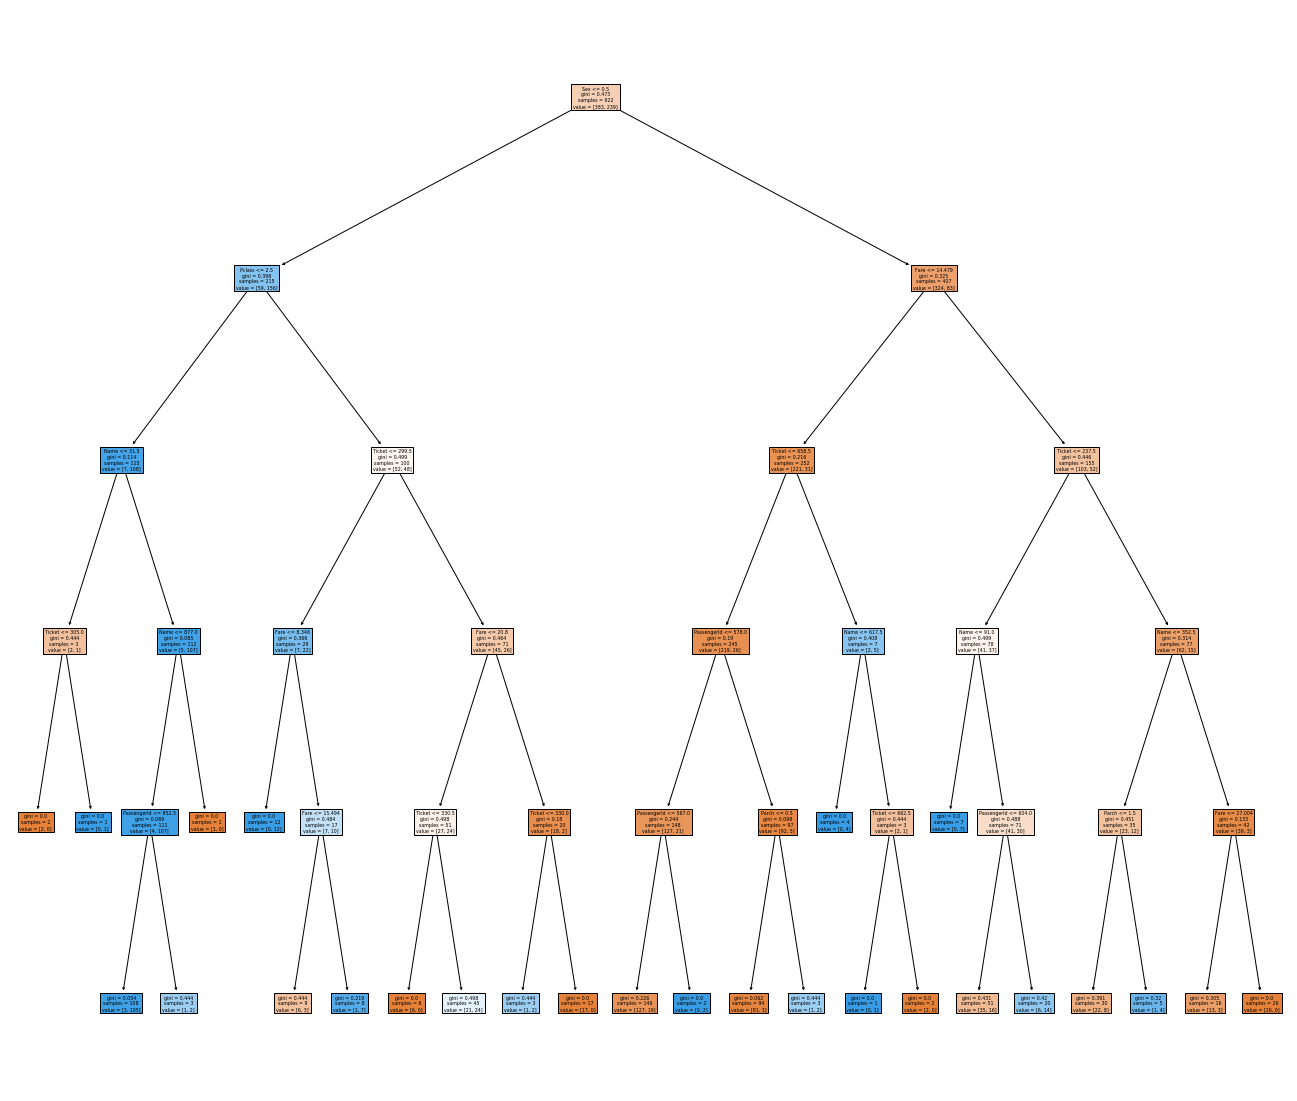

In [38]:
fig=plt.figure(figsize=(23,20))
_=tree.plot_tree(dt2,feature_names=features,filled=True)